We are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

Columns explanation :

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1
                  (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by user

Instructions

1. Import you data and perform basic data exploration phase

2. Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )

3. Perform hierarchical clustering to identify the inherent groupings within your data.
Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')

4. Perform partitional clustering using the K-means algorithm. Then, plot the clusters

5. Find the best k value and plot the clusters again.

6. Interpret the results



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
import sklearn
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_card_dataset.csv')
credit.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
 #Shape showe the numbers of the rows and columns in the data structured
credit.shape

(8950, 6)

In [ ]:
# Getting the detail information of the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [ ]:
credit.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [ ]:
# checking for the missing values
credit.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [ ]:
credit.isnull().sum().sum()


1

In [ ]:
# to fill the missing values
credit['CREDIT_LIMIT'] = credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].mean())

In [ ]:
credit.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [ ]:
credit.duplicated().sum()

0

In [ ]:
# Convert categorical data to numerical data using lebel encoding
from sklearn import preprocessing
lebel = preprocessing.LabelEncoder()
credit['CUST_ID'] = lebel.fit_transform(credit['CUST_ID'])
credit.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0,0.818182,95.40,201.802084,1000.0,0.000000
1,1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,2,1.000000,773.17,622.066742,7500.0,0.000000
3,3,0.636364,1499.00,0.000000,7500.0,205.788017
4,4,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
# Getting the correlations between the features
credit.corr()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
CUST_ID,1.000000,-0.111091,-0.140745,-0.168465,-0.353782,-0.084239
BALANCE_FREQUENCY,-0.111091,1.000000,0.133674,0.065008,0.095795,0.099388
PURCHASES,-0.140745,0.133674,1.000000,0.603264,0.356959,-0.051474
PAYMENTS,-0.168465,0.065008,0.603264,1.000000,0.421852,0.453238
CREDIT_LIMIT,-0.353782,0.095795,0.356959,0.421852,1.000000,0.303983
CASH_ADVANCE,-0.084239,0.099388,-0.051474,0.453238,0.303983,1.000000


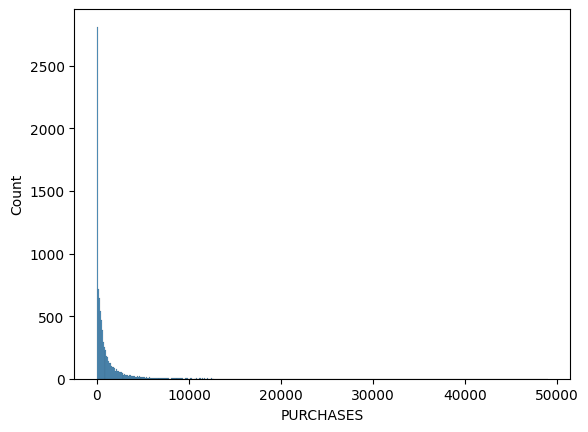

In [ ]:
sns.histplot(credit['PURCHASES'])
plt.show()

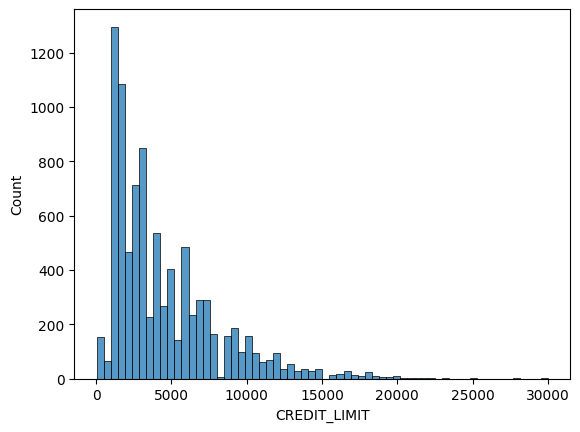

In [ ]:
sns.histplot(credit['CREDIT_LIMIT'])
plt.show()

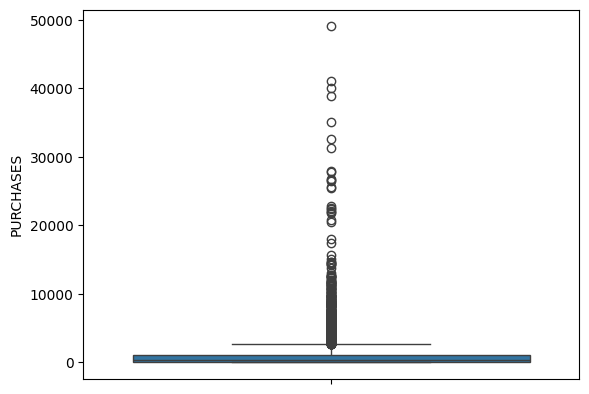

In [ ]:
sns.boxplot(credit['PURCHASES'])
plt.show()

In [ ]:
# Remove outliers using Interquantile range
Q1 = credit.PURCHASES.quantile(0.25)
Q3 = credit.PURCHASES.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = credit[(credit.PURCHASES < lower) | (credit.PURCHASES > upper)]
outliers.shape

(808, 6)

In [ ]:
# Drop outliers from the 'credit' DataFrame
credit = credit.drop(outliers.index)
credit.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0,0.818182,95.40,201.802084,1000.0,0.000000
1,1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,2,1.000000,773.17,622.066742,7500.0,0.000000
3,3,0.636364,1499.00,0.000000,7500.0,205.788017
4,4,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
# Verify the changes
credit.shape

(8142, 6)

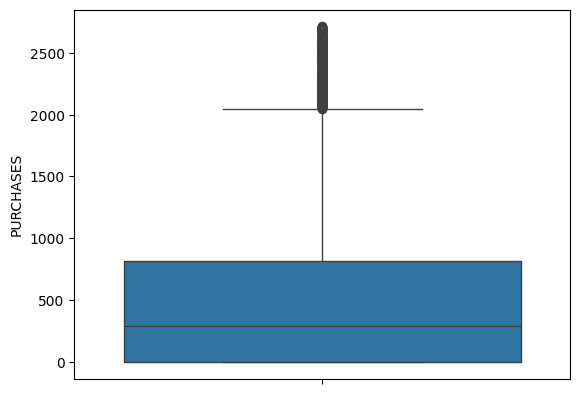

In [ ]:
# Verify the changes from thr outliers plot
sns.boxplot(credit['PURCHASES'])
plt.show()

In [ ]:
#Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(credit)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#After we finished creating our clusters, we can print each point’s corresponding cluster
agglomerative=pd.DataFrame(clust_labels)
agglomerative.head()

,0
0,2
1,2
2,2
3,2
4,2


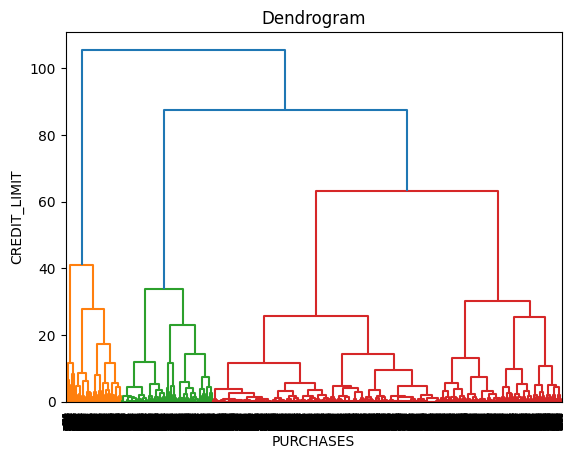

In [ ]:
# Selecting two features
x_hierarchical = credit[['PURCHASES','CREDIT_LIMIT']]

# Scaling the data
scaler = StandardScaler()
x_credit = scaler.fit_transform(x_hierarchical)

# Using Dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(x_credit, method='ward'))
plt.title('Dendrogram')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


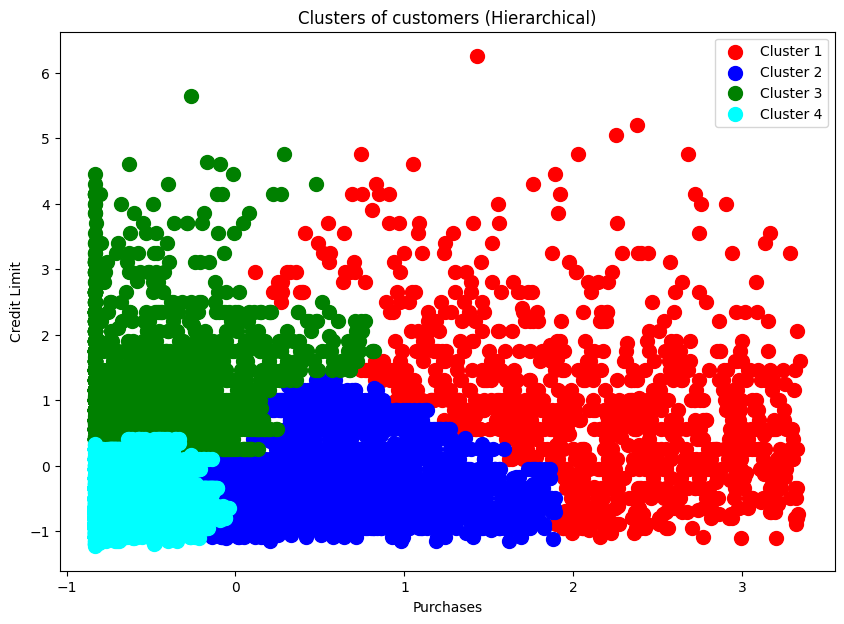

In [ ]:
# Fit hierarchical clustering with the optimal number of clusters

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x_credit)

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(x_credit[y_hc == 0, 0], x_credit[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x_credit[y_hc == 1, 0], x_credit[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_credit[y_hc == 2, 0], x_credit[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x_credit[y_hc == 3, 0], x_credit[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.title('Clusters of customers (Hierarchical)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

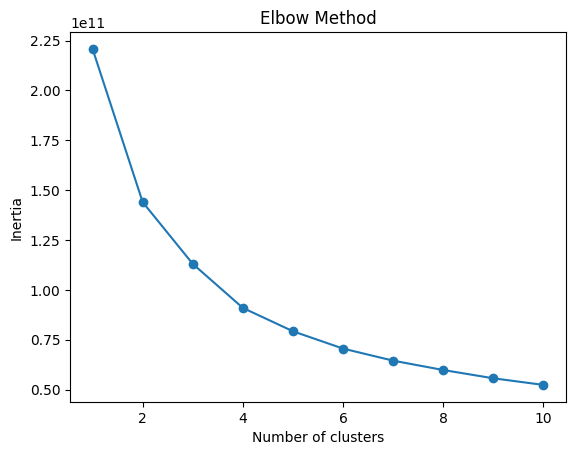

In [ ]:
inertia = []
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=10)
    model.fit(credit)
    inertia.append(model.inertia_)
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Fit the model
model = KMeans(n_clusters=4, random_state=42)
model.fit(credit)

# Assign labels to the dataframe
credit['label'] = model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


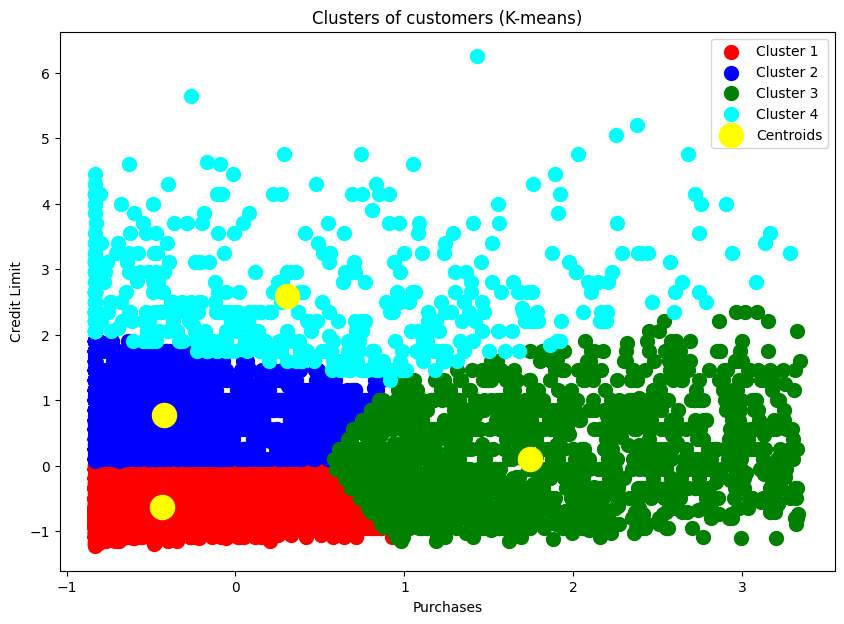

In [ ]:
# Fit K-means with the optimal number of clusters (let's assume 4 for this example)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x_credit)

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(x_credit[y_kmeans == 0, 0], x_credit[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x_credit[y_kmeans == 1, 0], x_credit[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_credit[y_kmeans == 2, 0], x_credit[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x_credit[y_kmeans == 3, 0], x_credit[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers (K-means)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

Interpretation of Results

Hierarchical Clustering:

The dendrogram generated by hierarchical clustering helps visualize the natural groupings within the data. It helps determine the potential number of clusters. It provides insights into how customers naturally group based on their purchasing behavior and credit limits in the dataset.

K-means Clustering:

The Elbow method used in K-means clustering helps determine the optimal number of clusters  The "elbow" point in the plot indicates a diminishing return on reducing WCSS, suggesting the optimal number of clusters. Visualizing the resulting clusters helps clearly segment the customer base according to their purchase amounts and credit limits